In [ ]:
!pip install opencv-python
!pip install pytesseract
!pip install numpy
!pip install pandas
!pip install matplotlib  # optional, for visualization
!pip install scikit-image  # optional, for tampering/structural checks


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 52.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
datasets 4.4.1 requires pyarrow>=

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\Noor\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
# C:\Users\Noor\AppData\Local\Programs\Tesseract-OCR

In [5]:
# !ls /kaggle/input/layoutlm-using-the-sroie-dataset

custom.css	    __output__.json    __results__.html
__notebook__.ipynb  __results___files


In [11]:
# import kagglehub
# from kagglehub.datasets import KaggleDatasetAdapter

# df_train = kagglehub.load_dataset(
#     KaggleDatasetAdapter.PANDAS,
#     "urbikn/sroie-datasetv2",
#     path="train.csv"
# )

# df_test = kagglehub.load_dataset(
#     KaggleDatasetAdapter.PANDAS,
#     "urbikn/sroie-datasetv2",
#     path="test.csv"
# )


/tmp/ipykernel_48/3336954966.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_train = kagglehub.load_dataset(


Mounting files to /kaggle/input/sroie-datasetv2...


ValueError: 'train.csv' is not present in the dataset files.You can acces the other files othe attached dataset at '/kaggle/input/sroie-datasetv2'

In [4]:
from pathlib import Path

# Image folders
train_img_folder = Path("/kaggle/input/sroie-datasetv2/SROIE2019/train/img")
test_img_folder = Path("/kaggle/input/sroie-datasetv2/SROIE2019/test/img")

# Get all image paths as plain Python lists
train_images = [str(f) for f in train_img_folder.glob("*.jpg")]
test_images = [str(f) for f in test_img_folder.glob("*.jpg")]

print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")
print("Sample training images:", train_images[:5])


Number of training images: 626
Number of test images: 347
Sample training images: ['/kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51007231344.jpg', '/kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51005442344.jpg', '/kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51008142030.jpg', '/kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51005447853.jpg', '/kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51007339113.jpg']


In [5]:
!ls //kaggle/input/sroie-datasetv2/SROIE2019/train/img

X00016469612.jpg  X51005719856.jpg  X51006466055.jpg  X51007339097.jpg
X00016469619.jpg  X51005719862.jpg  X51006466056.jpg  X51007339098.jpg
X00016469620.jpg  X51005719864.jpg  X51006466060.jpg  X51007339100.jpg
X00016469622.jpg  X51005719873.jpg  X51006466062.jpg  X51007339106.jpg
X00016469623.jpg  X51005719874.jpg  X51006466065.jpg  X51007339107.jpg
X00016469669.jpg  X51005719882.jpg  X51006466066.jpg  X51007339110.jpg
X00016469672.jpg  X51005719883.jpg  X51006466778.jpg  X51007339111.jpg
X00016469676.jpg  X51005719886.jpg  X51006502529.jpg  X51007339112.jpg
X51005200938.jpg  X51005719893.jpg  X51006502531.jpg  X51007339113.jpg
X51005230617.jpg  X51005719896.jpg  X51006502533.jpg  X51007339114.jpg
X51005255805.jpg  X51005719899.jpg  X51006554833.jpg  X51007339115.jpg
X51005268200.jpg  X51005719902.jpg  X51006555072.jpg  X51007339117.jpg
X51005268262.jpg  X51005719904.jpg  X51006555125.jpg  X51007339118.jpg
X51005268400.jpg  X51005719906.jpg  X51006555570.jpg  X51007339120.jpg
X51005

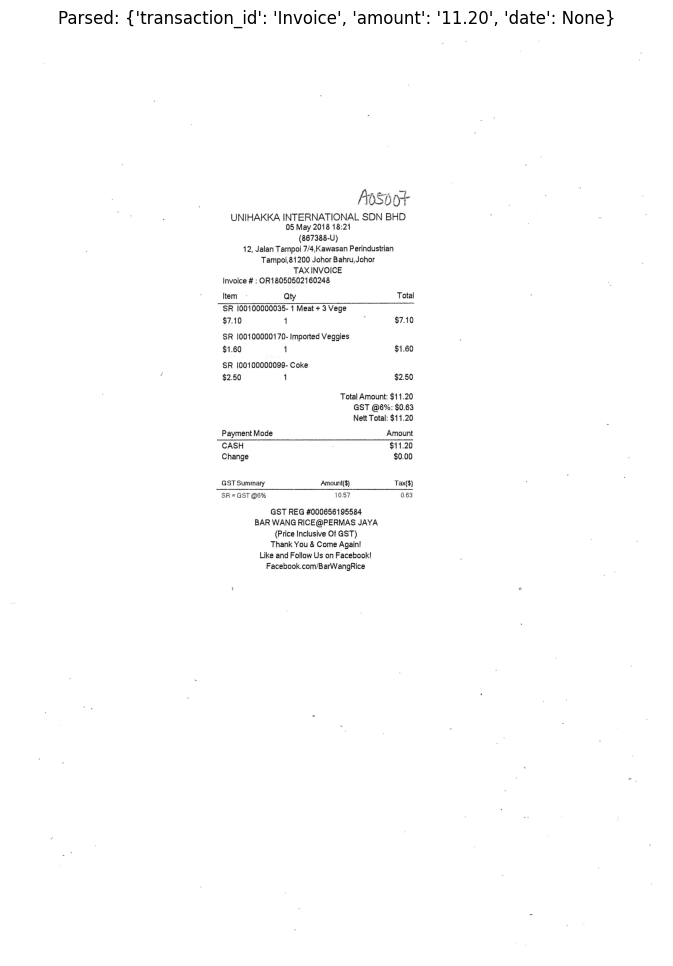

--- /kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51007231344.jpg ---
{'transaction_id': 'Invoice', 'amount': '11.20', 'date': None}




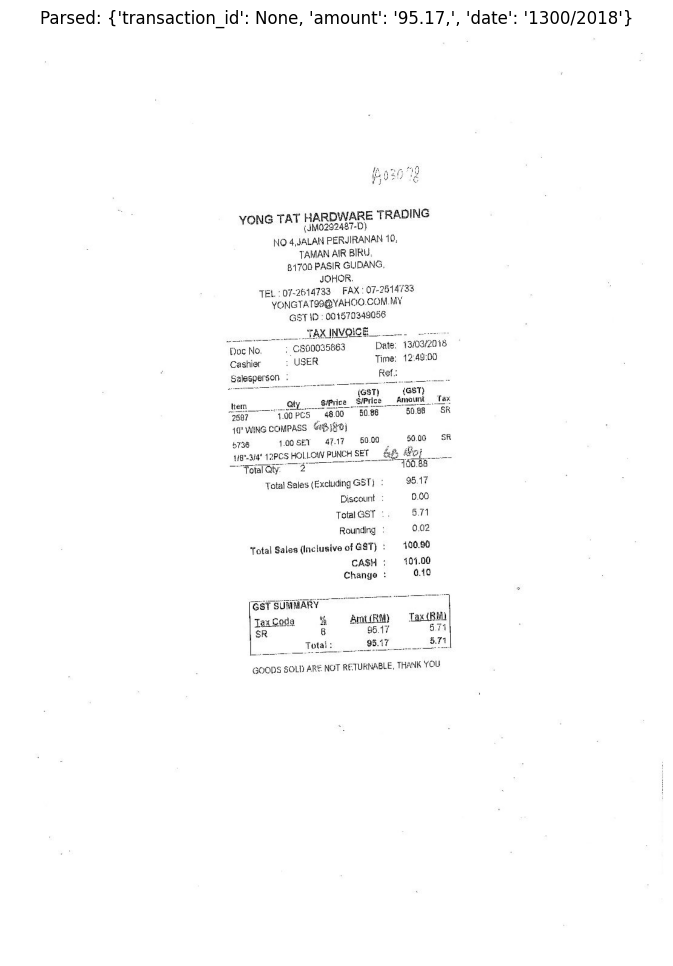

--- /kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51005442344.jpg ---
{'transaction_id': None, 'amount': '95.17,', 'date': '1300/2018'}




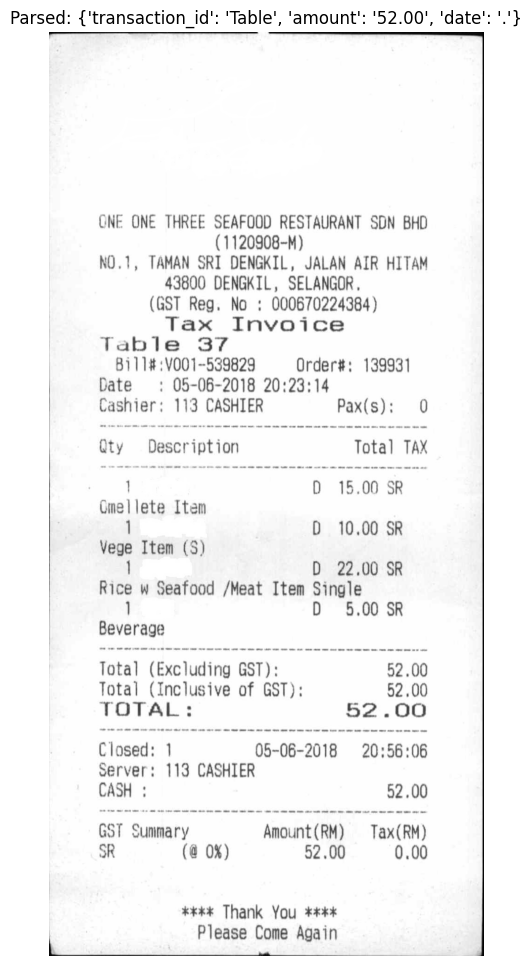

--- /kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51008142030.jpg ---
{'transaction_id': 'Table', 'amount': '52.00', 'date': '.'}




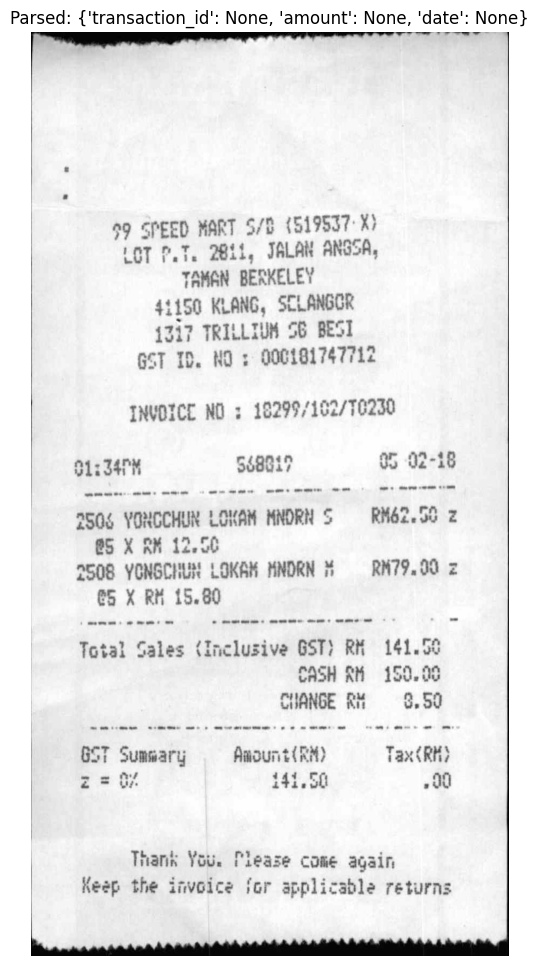

--- /kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51005447853.jpg ---
{'transaction_id': None, 'amount': None, 'date': None}




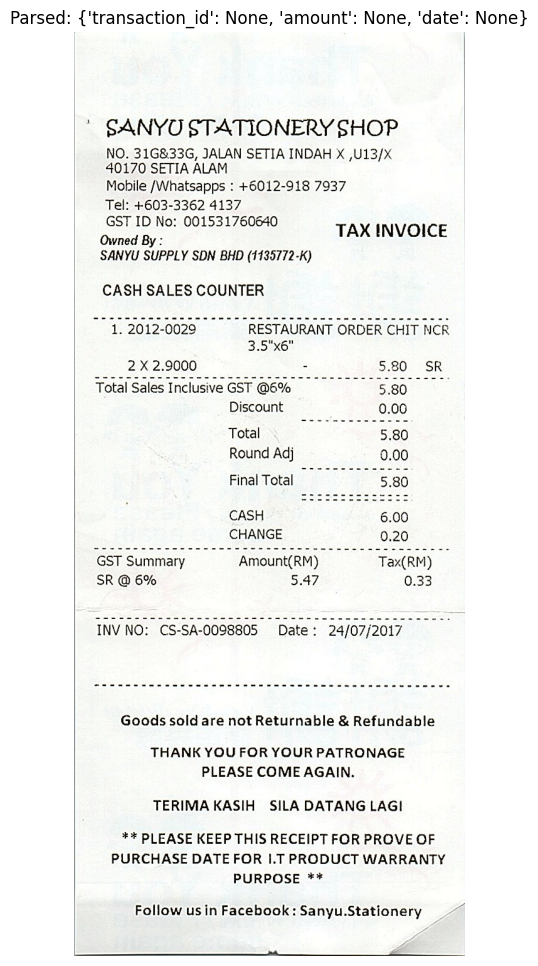

--- /kaggle/input/sroie-datasetv2/SROIE2019/train/img/X51007339113.jpg ---
{'transaction_id': None, 'amount': None, 'date': None}




In [19]:
import cv2
import pytesseract
import re
import matplotlib.pyplot as plt

# ------------------ Image Preprocessing ------------------
def preprocess_image(img_path):
    """
    Load, grayscale, blur, and threshold image for better OCR.
    """
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )
    return thresh

# ------------------ OCR Extraction ------------------
def extract_text(img):
    """
    Use pytesseract to extract text from preprocessed image.
    """
    return pytesseract.image_to_string(img)

# ------------------ Receipt Parsing ------------------
def parse_receipt(text):
    """
    Extract transaction_id, amount, and date from OCR text.
    Handles values on the next line.
    """
    # Keep line breaks for pattern matching
    clean_text = text

    # Transaction patterns (label may be on one line, value on next)
    transaction_patterns = [
        r'(?:Transaction\s*ID|Trans\s*ID|Invoice\s*No\.?|Invoice|Bill\s*No\.?|Bill|Receipt\s*No\.?|Receipt|Doc\s*No\.?|Doc)\s*[:#\s]*\n?\s*([\w\-\/]+)'
    ]

    # Amount patterns
    amount_patterns = [
        r'(?:Amount|Total|Grand\s*Total|Amount\s*Paid|Net\s*Total)\s*[:\s]*\$?\n?\s*([\d,\.]+)'
    ]

    # Date patterns
    date_patterns = [
        r'(?:Date|Invoice\s*Date|Bill\s*Date|Issued\s*On)\s*[:\s]*\n?\s*([\d/.-]+)'
    ]

    def search_patterns(patterns, text):
        for p in patterns:
            match = re.search(p, text, flags=re.IGNORECASE | re.MULTILINE)
            if match:
                return match.group(1).strip()
        return None

    return {
        "transaction_id": search_patterns(transaction_patterns, clean_text),
        "amount": search_patterns(amount_patterns, clean_text),
        "date": search_patterns(date_patterns, clean_text)
    }


# ------------------ Example Usage ------------------
def display_and_parse_receipts(image_paths, num=5):
    for img_path in image_paths[:num]:
        # Preprocess and extract text
        processed_img = preprocess_image(img_path)
        text = extract_text(processed_img)
        parsed = parse_receipt(text)

        # Load original image for display
        img = cv2.imread(img_path)
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(12,12))
        plt.imshow(rgb)
        plt.title(f"Parsed: {parsed}")
        plt.axis("off")
        plt.show()
        
        print(f"--- {img_path} ---")
        print(parsed)
        print("\n")

# ------------------ Run on your training images ------------------
# Assuming train_images is a list of file paths
display_and_parse_receipts(train_images, num=5)


Approach two where ocr + model

In [25]:
import os
import json
import pandas as pd

# Paths
img_folder = "/kaggle/input/sroie-datasetv2/SROIE2019/train/img/"
box_folder = "/kaggle/input/sroie-datasetv2/SROIE2019/train/box/"
entity_folder = "/kaggle/input/sroie-datasetv2/SROIE2019/train/entities/"

# Define class mapping
classes = {"company": 0, "date": 1, "total": 2, "address": 3}

dataset_entries = []

for file_name in os.listdir(img_folder):
    if not file_name.endswith(".jpg"):
        continue
    base_name = file_name.split(".")[0]
    
    # Load entity JSON
    entity_path = os.path.join(entity_folder, base_name + ".txt")
    with open(entity_path, "r", encoding="utf-8") as f:
        entities = json.load(f)
    
    # Load box file
    box_path = os.path.join(box_folder, base_name + ".txt")
    with open(box_path, "r", encoding="utf-8") as f:
        boxes = f.readlines()
    
    # Assign class labels
    for line in boxes:
        coords = line.strip().split(",")
        word = coords[-1]
        x1, y1 = int(coords[0]), int(coords[1])
        x2, y2 = int(coords[4]), int(coords[5])
        
        # Match word to entity class if possible
        assigned_class = None
        for key, val in entities.items():
            if word in val:
                assigned_class = classes[key]
                break
        
        if assigned_class is not None:
            dataset_entries.append({
                "image_path": os.path.join(img_folder, file_name),
                "x_min": x1,
                "y_min": y1,
                "x_max": x2,
                "y_max": y2,
                "class_id": assigned_class
            })

# Convert to DataFrame and save
df = pd.DataFrame(dataset_entries)
df.to_csv("sroie_train_detection.csv", index=False)
print(df.head())


                                          image_path  x_min  y_min  x_max  \
0  /kaggle/input/sroie-datasetv2/SROIE2019/train/...   1667   1369   3007   
1  /kaggle/input/sroie-datasetv2/SROIE2019/train/...   1762   1611   2916   
2  /kaggle/input/sroie-datasetv2/SROIE2019/train/...   1898   1693   2778   
3  /kaggle/input/sroie-datasetv2/SROIE2019/train/...   2071   2161   2114   
4  /kaggle/input/sroie-datasetv2/SROIE2019/train/...   2073   2379   2108   

   y_max  class_id  
0   1438         0  
1   1675         3  
2   1754         3  
3   2219         1  
4   2445         1  


In [26]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 65.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import cv2
import easyocr
import re
from rapidfuzz import fuzz

# 1️⃣ Image Preprocessing
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Denoise
    gray = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
    # Thresholding for better contrast
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

# 2️⃣ Fuzzy keyword extraction
def extract_field_fuzzy(lines, keywords, threshold=70):
    for line in lines:
        print(line,'\n')
        for kw in keywords:
            
            if fuzz.partial_ratio(line.lower(), kw.lower()) >= threshold:
                # Extract numbers or text after the keyword
                match = re.search(r'([A-Za-z0-9\-\./]+)', line)
                if match:
                    return match.group(1)
    return None

# 3️⃣ Extract fields from OCR text
def extract_receipt_fields(img_path):
    img = preprocess_image(img_path)
    reader = easyocr.Reader(['en'])
    results = reader.readtext(img)

    # Flatten results to just text
    lines = [res[1] for res in results]

    # Define possible keywords for each field
    transaction_keywords = ["document no", "invoice id", "bill id", "transaction id"]
    amount_keywords = ["amount", "total", "amt", "total amount", "grand total"]
    date_keywords = ["date", "payment date"]

    # Fuzzy extraction
    transaction_id = extract_field_fuzzy(lines, transaction_keywords)
    amount = extract_field_fuzzy(lines, amount_keywords)
    date = extract_field_fuzzy(lines, date_keywords)

    return {
        "transaction_id": transaction_id,
        "amount": amount,
        "date": date
    }

# Example usage
img_path = "/kaggle/input/sroie-datasetv2/SROIE2019/train/img/X00016469612.jpg"
fields = extract_receipt_fields(img_path)
print(fields)


tan woon yann 

Book TA 

K (TAMANDAYA)SDM #uld 

14t | 

IAtI ANN 

A'4MM 

'ANA 

tan woon yann 

Book TA 

K (TAMANDAYA)SDM #uld 

14t | 

IAtI ANN 

A'4MM 

'ANA 

1ATA 

1"m) 

IM' 

4M6L" 

Irn( 

IM 

MAti" 

(enilit 

CASH BILL 

Ml.1 <1'[ 

'ful 

Juw 

Round 

d Tutal 

tan woon yann 

Book TA 

K (TAMANDAYA)SDM #uld 

14t | 

IAtI ANN 

A'4MM 

'ANA 

1ATA 

1"m) 

IM' 

4M6L" 

Irn( 

IM 

MAti" 

(enilit 

CASH BILL 

Ml.1 <1'[ 

'ful 

Juw 

Round 

d Tutal 

RM): 

(1o 

MuaM 

9.6u 

1'4h1 

At ( 

Mr 

FLE4, 

" 

N , 

{'transaction_id': 'ANA', 'amount': 'd', 'date': None}


In [4]:
!pip install rapidfuzz
